K-Nearest_Neighbor algorithm

In [1]:
#importing the required libraries

import numpy as np
import pandas as pd
import pylab as pl

from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor

In [2]:
#importing the csv file in 'data' dataframe 

data = pd.read_csv("D:/_College/6th Quarter/DSC 478/Project/finalproject/FINAL.csv")
data.head()

,price_t,bedrooms,bathrooms,sqft_living_t,sqft_lot,floors,waterfront,view,condition,grade,...,zip1,zip2,zip3,year_1,year_2,log_sqft_lot,sqft_basement,yr_renovated_T,yr_renovated_d,yr_renovated_age
0,203000,3,1.75,1190.0,6000,1.0,0,0,3,7,...,0,0,0,0,0,8.699515,0,2015,1,0
1,230000,3,1.50,1040.0,1264,2.0,0,0,3,9,...,0,0,0,1,0,7.142037,190,2015,0,0
2,285000,4,3.50,2770.0,10505,2.0,0,0,3,8,...,0,0,0,0,0,9.259607,0,2015,1,0
3,335000,3,2.00,1210.0,9926,1.0,0,0,4,7,...,1,0,0,0,0,9.202913,0,2015,1,0
4,350000,3,2.00,1380.0,3600,3.0,0,0,3,8,...,0,0,0,1,0,8.188689,0,2015,0,0


In [3]:
#dropping some columns which I wont be necessary for the analysis here. I have done that analysis in my DSC 423 class.

data = data.drop(columns = ['yr_built', 'yr_renovated', 'zip_range3', 'zip1', 'zip2', 'zip3', 'year_1', 'year_2', 'log_sqft_lot', 'sqft_basement', 'yr_renovated_T', 'yr_renovated_d', 'yr_renovated_age', 'sqft_basement_t'])
data = data[:5000]

#There are 21612 number of instances in dataset but I am chosing 5000 to reduce further processing

#creating copy of dataframe for further use while doing regression
data2 = data.copy()
data2.describe()

,price_t,bedrooms,bathrooms,sqft_living_t,sqft_lot,floors,waterfront,view,condition,grade,sqft_above
count,5.000000e+03,5000.000000,5000.000000,5000.00000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,5.791247e+05,3.499800,2.653300,2405.05000,1.153374e+04,2.009400,0.005400,0.186000,3.010600,8.283200,2255.083400
std,2.588944e+05,0.886881,0.658434,909.09479,4.492234e+04,0.454701,0.073293,0.691303,0.113535,1.092903,948.819331
min,1.100000e+05,0.000000,0.000000,384.00000,5.720000e+02,1.000000,0.000000,0.000000,3.000000,4.000000,384.000000
25%,3.750000e+05,3.000000,2.500000,1630.00000,2.759500e+03,2.000000,0.000000,0.000000,3.000000,8.000000,1509.000000
50%,5.100000e+05,3.000000,2.500000,2320.00000,5.006500e+03,2.000000,0.000000,0.000000,3.000000,8.000000,2180.000000
75%,7.341250e+05,4.000000,3.000000,3050.00000,7.363250e+03,2.000000,0.000000,0.000000,3.000000,9.000000,2846.750000
max,1.129574e+06,10.000000,7.750000,4234.50000,1.024068e+06,3.500000,1.000000,4.000000,5.000000,13.000000,8860.000000


In [4]:
#categorising the price_t variable into categorized name as "cheap", "low-average", high-average, expensive

for i in range(len(data.price_t)):
    if data.price_t[i] < 350000:
         data.price_t[i] = "cheap"
        
    elif data.price_t[i] >= 350000 and data.price_t[i] < 750000:
         data.price_t[i] = "low-average"
            
    elif data.price_t[i] >= 750000 and data.price_t[i] <= 100000:
         data.price_t[i] = "high-average"
    
    elif data.price_t[i] > 100000:
         data.price_t[i] = "expensive"

C:\Users\ashay\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-4-c630bc0af7cf>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.price_t[i] = "cheap"
<ipython-input-4-c630bc0af7cf>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.price_t[i] = "low-average"
<ipython-input-4-c630bc0af7cf>:14: SettingWithCopyWarning: 


In [5]:
#creating new variable, y, for target variable to perform KNN (K-Nearest Neighbours)

y = data.price_t
data.price_t.unique()

array(['cheap', 'low-average', 'expensive'], dtype=object)

In [6]:
#creating new dataframe by separating the target variable i.e. categorised price (price_t)  

new_data = data[['bedrooms','bathrooms','sqft_living_t','sqft_lot','floors','waterfront', 'view', 'condition', 'grade', 'sqft_above']]
new_data.head()

,bedrooms,bathrooms,sqft_living_t,sqft_lot,floors,waterfront,view,condition,grade,sqft_above
0,3,1.75,1190.0,6000,1.0,0,0,3,7,1190
1,3,1.50,1040.0,1264,2.0,0,0,3,9,900
2,4,3.50,2770.0,10505,2.0,0,0,3,8,2770
3,3,2.00,1210.0,9926,1.0,0,0,4,7,1210
4,3,2.00,1380.0,3600,3.0,0,0,3,8,1380


In [7]:
#displaying the target variable
target = data.price_t
target.head()

0          cheap
1          cheap
2          cheap
3          cheap
4    low-average
Name: price_t, dtype: object

In [8]:
#splitting the data randomly into test and train dataset of both the data and the target variable by using sklearn library.

from sklearn.model_selection import train_test_split
vs_train, vs_test, vs_target_train, vs_target_test = train_test_split(new_data, target, test_size=0.2, random_state=33)

In [9]:
#performing the min-max normalisation on the datasets for performing kNN.

from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler().fit(vs_train)
vs_train_norm = min_max_scaler.transform(vs_train)
vs_test_norm = min_max_scaler.transform(vs_test)

np.set_printoptions(precision=2, linewidth=80, suppress=True)
vs_train_norm[0:5]

array([[0.4 , 0.32, 0.7 , 0.01, 0.4 , 0.  , 0.  , 0.  , 0.56, 0.32],
       [0.4 , 0.25, 0.57, 0.  , 0.4 , 0.  , 0.  , 0.  , 0.56, 0.26],
       [0.4 , 0.25, 0.42, 0.01, 0.4 , 0.  , 0.  , 0.  , 0.44, 0.19],
       [0.4 , 0.29, 0.49, 0.  , 0.4 , 0.  , 0.  , 0.  , 0.33, 0.22],
       [0.4 , 0.25, 0.41, 0.01, 0.4 , 0.  , 0.  , 0.  , 0.44, 0.19]])

In [10]:
from sklearn import neighbors

In [11]:
#selecting the k value as 10

n_neighbors = 10

knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knnclf.fit(vs_train_norm, vs_target_train)

KNeighborsClassifier(n_neighbors=10, weights='distance')

In [12]:
knnpreds_test = knnclf.predict(vs_test_norm)

In [13]:
#printing the array of predictionof classes of all instance

print (knnpreds_test)

['low-average' 'low-average' 'low-average' 'low-average' 'low-average'
 'low-average' 'expensive' 'low-average' 'low-average' 'cheap' 'cheap'
 'low-average' 'low-average' 'expensive' 'low-average' 'low-average'
 'low-average' 'cheap' 'low-average' 'cheap' 'low-average' 'low-average'
 'low-average' 'low-average' 'expensive' 'expensive' 'low-average'
 'low-average' 'low-average' 'low-average' 'low-average' 'low-average'
 'expensive' 'cheap' 'cheap' 'expensive' 'low-average' 'low-average'
 'low-average' 'low-average' 'cheap' 'low-average' 'cheap' 'expensive'
 'expensive' 'low-average' 'low-average' 'low-average' 'cheap' 'low-average'
 'low-average' 'low-average' 'low-average' 'low-average' 'cheap' 'low-average'
 'low-average' 'low-average' 'low-average' 'cheap' 'low-average' 'cheap'
 'cheap' 'low-average' 'cheap' 'low-average' 'low-average' 'cheap' 'expensive'
 'low-average' 'low-average' 'cheap' 'expensive' 'expensive' 'expensive'
 'low-average' 'low-average' 'cheap' 'low-average' 'expen

In [14]:
from sklearn.metrics import classification_report

In [15]:
#printing the classification report to see the accuracy of the knn classifier.
#U can see that the accuracy is 0.74 which is good.
#0.74 percent accuracy states that the value predicted for the classes is 74% accurate.

print(classification_report(vs_target_test, knnpreds_test))

              precision    recall  f1-score   support

       cheap       0.60      0.60      0.60       205
   expensive       0.81      0.74      0.77       232
 low-average       0.76      0.79      0.77       563

    accuracy                           0.74      1000
   macro avg       0.72      0.71      0.72      1000
weighted avg       0.74      0.74      0.74      1000



In [16]:
from sklearn.metrics import confusion_matrix

In [17]:
#displaying the confusion matrix

knncm = confusion_matrix(vs_target_test, knnpreds_test)
print (knncm)

[[122   0  83]
 [  1 172  59]
 [ 79  40 444]]


In [18]:
#this values shows how accurate does KNN classify the instances on testing dataset.
#Here knn classifiers accurately predicts the class of instance 73.8% which is good.
#i tried different values of k but found best value for k is 10


print (knnclf.score(vs_test_norm, vs_target_test))

0.738


In [19]:
#this values shows how accurate does KNN classify the instances on training dataset.
#but we can see that score here is too high, 99.9%!. 
#There is  overfitting 

print (knnclf.score(vs_train_norm, vs_target_train))

0.99925


In [20]:
#knn search function

def knn_search(x, D, K, measure):
    """ find K nearest neighbors of an instance x among the instances in D """
    if measure == 0:
        # euclidean distances from the other points
        dists = np.sqrt(((D - x)**2).sum(axis=1))
    elif measure == 1:
        # first find the vector norm for each instance in D as wel as the norm for vector x
        D_norm = np.array([np.linalg.norm(D[i]) for i in range(len(D))])
        x_norm = np.linalg.norm(x)
        # Compute Cosine: divide the dot product o x and each instance in D by the product of the two norms
        sims = np.dot(D,x)/(D_norm * x_norm)
        # The distance measure will be the inverse of Cosine similarity
        dists = 1 - sims
    idx = np.argsort(dists) # sorting
    # return the indexes of K nearest neighbors
    return idx[:K], dists

In [21]:
#getting array of neighbour indices of cluster and array of distance between them

neigh_idx, distances = knn_search(vs_test_norm[0], vs_train_norm, 5, 0)

In [22]:
#priting the indices of the instances around which clusters are made,
#or we can say these values are the center of the 4 different clusters

print (neigh_idx)
print ("\n")
vs_train.iloc[neigh_idx]

[2825  347 2746  442 1840]




,bedrooms,bathrooms,sqft_living_t,sqft_lot,floors,waterfront,view,condition,grade,sqft_above
4858,4,3.5,3510.0,9263,2.0,0,0,3,10,3510
4845,4,3.5,3510.0,9084,2.0,0,0,3,10,3510
4221,4,3.5,3540.0,4750,2.0,0,0,3,10,3540
1406,4,3.5,3460.0,7702,2.0,0,0,3,10,3460
570,4,3.5,3560.0,6562,2.0,0,0,3,10,3560


In [23]:
#printing the distances between the clusters
#clusters seems very close

print (distances[neigh_idx])

[0.   0.   0.01 0.01 0.01]


In [24]:
#converting the arrays into appropiate datastructure for further analysis

vs_target_train = np.array(vs_target_train)
vs_target_test = np.array(vs_target_test)

In [25]:
#printing the labels of neighbours

neigh_labels = vs_target_train[neigh_idx]
print (neigh_labels)

['low-average' 'low-average' 'low-average' 'expensive' 'expensive']


In [26]:
#to find the majority class in this dataset which looks like it is high-average

from collections import Counter
print (Counter(neigh_labels))

Counter({'low-average': 3, 'expensive': 2})


In [27]:
Counter(neigh_labels).most_common(1)

[('low-average', 3)]

In [28]:
dataSetSize = vs_train_norm.shape[0]
print (dataSetSize)

4000


In [29]:
inX = vs_test_norm[0]   # We'll use the first instance in the test data for this example
                        #if we want to test other instances we will have to change the index value here.
    
diffMat = np.tile(inX, (dataSetSize,1)) - vs_train_norm  # Create dataSetSize copies of inX, as rows of a 2D matrix
                                                         # Compute a matrix of differences
print (diffMat[:5,:])

[[0.   0.07 0.11 0.   0.   0.   0.   0.   0.11 0.05]
 [0.   0.14 0.24 0.   0.   0.   0.   0.   0.11 0.11]
 [0.   0.14 0.4  0.   0.   0.   0.   0.   0.22 0.18]
 [0.   0.11 0.32 0.   0.   0.   0.   0.   0.33 0.15]
 [0.   0.14 0.4  0.   0.   0.   0.   0.   0.22 0.18]]


In [30]:
sqDiffMat = diffMat**2  # The matrix of squared differences
sqDistances = sqDiffMat.sum(axis=1)  # 1D array of the sum of squared differences (one element for each training instance)
distances = sqDistances**0.5  # and finally the matrix of Euclidean distances to inX
print (distances)

[0.18 0.32 0.51 ... 0.97 0.76 0.62]


In [31]:
#to find the classification of test instance we have to find the majority of the classes surrounding it
sortedDistIndicies = distances.argsort() # the indices of the training instances in increasing order of distance to inX
\
classCount={}
k = 5  # We'll use the top 5 neighbors
for i in range(k):
   voteIlabel = vs_target_train[sortedDistIndicies[i]]
   classCount[voteIlabel] = classCount.get(voteIlabel,0) + 1  # add to the count of the label or retun 1 for first occurrence
   print (sortedDistIndicies[i], voteIlabel, classCount[voteIlabel])

2825 low-average 1
347 low-average 2
2746 low-average 3
442 expensive 1
1840 expensive 2


In [32]:
#This block gives the predicted class of the instance that we have selected above.
#Here the predicted class of the instance is high-average house

import operator
# Create a dictionary for the class labels with cumulative occurrences across the neighbors as values
# Dictionary will be ordered in decreasing order of the lable values (so the majority class label will
# be the first dictonary element)
sortedClassCount = sorted(classCount.items(), key=operator.itemgetter(1), reverse=True)
print (sortedClassCount)
print (sortedClassCount[0][0])

[('low-average', 3), ('expensive', 2)]
low-average


In [33]:
from collections import Counter

k = 10  # We'll use the top 5 neighbors
vote = vs_target_train[sortedDistIndicies[0:k]]
maj_class = Counter(vote).most_common(1)

print (vote)

print (maj_class)

print ("Class label for the classified istance: ", maj_class[0][0])

['low-average' 'low-average' 'low-average' 'expensive' 'expensive' 'expensive'
 'expensive' 'expensive' 'low-average' 'expensive']
[('expensive', 6)]
Class label for the classified istance:  expensive


In [34]:
import kNN

In [35]:
numTestVecs = len(vs_target_test)
print (numTestVecs)

1000


In [36]:
#this function uses Euclidead distance method to predict the classes of the instances.
#this function displays what should be real prediction and what has this knn classifier has predicted
#after finding all the prediction it shows the error rate.
#error rate tells how precisely the instances are classified to the correct class.
#less the error rate better the precision of this classifier
#as here error rate is 25.5%, which means that this knn classifier classifies the instances correctly 74.5% of times.
#We have seen this value above while checking the scores of predictions of the classifier
#as error is less we can consider this knn classifier for classification

errorCount = 0.0
for i in range(numTestVecs):
    # classify0 function uses Euclidean distance to find k nearest neighbors
    classifierResult = kNN.classify0(vs_test_norm[i,:], vs_train_norm, vs_target_train, 3)
    print ("the classifier came back with: %s, the real answer is: %s" % (classifierResult, vs_target_test[i]))
    if (classifierResult != vs_target_test[i]): errorCount += 1.0
        
print ("the total error rate is: %f" % (errorCount/float(numTestVecs)))

the classifier came back with: low-average, the real answer is: low-average
the classifier came back with: low-average, the real answer is: low-average
the classifier came back with: low-average, the real answer is: low-average
the classifier came back with: low-average, the real answer is: low-average
the classifier came back with: low-average, the real answer is: low-average
the classifier came back with: low-average, the real answer is: low-average
the classifier came back with: expensive, the real answer is: low-average
the classifier came back with: low-average, the real answer is: low-average
the classifier came back with: low-average, the real answer is: low-average
the classifier came back with: cheap, the real answer is: cheap
the classifier came back with: cheap, the real answer is: cheap
the classifier came back with: low-average, the real answer is: low-average
the classifier came back with: low-average, the real answer is: low-average
the classifier came back with: expensi

In [37]:
from importlib import reload
reload(kNN)

<module 'kNN' from 'C:\\Users\\ashay\\DSC 478\\Final Project\\kNN.py'>

In [38]:
#inverse of cosine method is use to classify instead of the euclidean distance and has shown similar error rate as above.
#here error rate is 26.5% which is similar


errorCount = 0.0
for i in range(numTestVecs):
    # classify1 function uses inverse of Cosine similarity to find k nearest neighbors
    classifierResult2 = kNN.classify1(vs_test_norm[i,:], vs_train_norm, vs_target_train, 3)
    print ("the classifier came back with: %s, the real answer is: %s" % (classifierResult2, vs_target_test[i]))
    if (classifierResult2 != vs_target_test[i]): errorCount += 1.0
print ("the total error rate is: %f" % (errorCount/float(numTestVecs)))

the classifier came back with: low-average, the real answer is: low-average
the classifier came back with: low-average, the real answer is: low-average
the classifier came back with: low-average, the real answer is: low-average
the classifier came back with: low-average, the real answer is: low-average
the classifier came back with: low-average, the real answer is: low-average
the classifier came back with: low-average, the real answer is: low-average
the classifier came back with: expensive, the real answer is: low-average
the classifier came back with: low-average, the real answer is: low-average
the classifier came back with: low-average, the real answer is: low-average
the classifier came back with: cheap, the real answer is: cheap
the classifier came back with: cheap, the real answer is: cheap
the classifier came back with: low-average, the real answer is: low-average
the classifier came back with: low-average, the real answer is: low-average
the classifier came back with: expensi

Linear Regression

In [39]:
#here prices are not categorised like done earlier.
#directly values of prices are used for the regression here, ofcourse we can't use predicted classes here like 'cheap', 'expensive etc'.
data2

,price_t,bedrooms,bathrooms,sqft_living_t,sqft_lot,floors,waterfront,view,condition,grade,sqft_above
0,203000,3,1.75,1190.0,6000,1.0,0,0,3,7,1190
1,230000,3,1.50,1040.0,1264,2.0,0,0,3,9,900
2,285000,4,3.50,2770.0,10505,2.0,0,0,3,8,2770
3,335000,3,2.00,1210.0,9926,1.0,0,0,4,7,1210
4,350000,3,2.00,1380.0,3600,3.0,0,0,3,8,1380
...,...,...,...,...,...,...,...,...,...,...,...
4995,344000,5,2.00,2130.0,8412,1.0,0,0,3,7,1440
4996,344200,4,2.50,2490.0,5812,2.0,0,0,3,8,2490
4997,345000,3,2.75,2190.0,7258,2.0,0,0,3,8,2190
4998,345000,3,3.25,1600.0,1882,2.0,0,0,3,8,1360


In [40]:
#adding a column with value 1 for performing regression

data2['linReg'] = '1'

In [41]:
#separating the target values i.e. prices of houses

target = data2['price_t']
target

0       203000
1       230000
2       285000
3       335000
4       350000
         ...  
4995    344000
4996    344200
4997    345000
4998    345000
4999    345000
Name: price_t, Length: 5000, dtype: int64

In [42]:
#basic preprocessing for performing linear regression

data2 = data2.drop(columns = ['price_t'])
data2.head()

,bedrooms,bathrooms,sqft_living_t,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,linReg
0,3,1.75,1190.0,6000,1.0,0,0,3,7,1190,1
1,3,1.50,1040.0,1264,2.0,0,0,3,9,900,1
2,4,3.50,2770.0,10505,2.0,0,0,3,8,2770,1
3,3,2.00,1210.0,9926,1.0,0,0,4,7,1210,1
4,3,2.00,1380.0,3600,3.0,0,0,3,8,1380,1


In [43]:
#printing column names

features = list(data2.columns)
features

['bedrooms',
 'bathrooms',
 'sqft_living_t',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'linReg']

In [44]:
#ensuring the data and the target variable into correct data structure for further steps
#assigning data2 and target variable to x and y respectively for easy execution further steps

data2 = np.array(data2)
target = np.array(target)
x = data2
y = target

In [45]:
#performing linear regression on data and target variable.

linreg = LinearRegression()
linreg.fit(x,y)

LinearRegression()

In [46]:
#these are predictions of first 10 instances.
#we will have to check how precisely these instances are correlated to the prices of houses.

print (linreg.predict(x[:10]))

[271893.27 482819.19 580342.64 308744.95 420287.7  547102.51 149848.19
 449186.48 611351.55 425138.31]


In [47]:
# Compute RMSE on training data
p = linreg.predict(x)

# Now we can constuct a vector of errors
err = abs(p-y)

# displaying the error on the first 10 predictions
print (err[:10])

[ 68893.27 252819.19 295342.64  26255.05  70287.7  190102.51 235346.81
  59236.48 191351.55  29861.69]


In [48]:
# Dot product of error vector with itself gives us the sum of squared errors
#below values shows the RMSE value on the train dataset.
#RMSE value is very high
#to lower this RMSE value maybe we have to normalised the data. Also faster computing will be possible

total_error = np.dot(err,err)

# Compute RMSE
rmse_train = np.sqrt(total_error/len(p))
print (rmse_train)
print(round(rmse_train,2))

148659.78453229545
148659.78


In [49]:
#these are the regression coeeficient of the variable considered

np.set_printoptions(precision=2, linewidth=120, suppress=True, edgeitems=7)
print ('Regression Coefficients: \n', linreg.coef_)

Regression Coefficients: 
 [-28742.55  28493.76    189.29      0.03   5938.86  85922.05  25599.27  27442.75 108702.94    -80.07      0.  ]


In [50]:
#displaying the regression coeeficient of the variables.

for i in range(len(features)):
    print("Feature: %s, Regression Coefficient is: %s" % (features[i], linreg.coef_[i]))

Feature: bedrooms, Regression Coefficient is: -28742.55355882882
Feature: bathrooms, Regression Coefficient is: 28493.764926039785
Feature: sqft_living_t, Regression Coefficient is: 189.29122857311464
Feature: sqft_lot, Regression Coefficient is: 0.02573932261147747
Feature: floors, Regression Coefficient is: 5938.864322795799
Feature: waterfront, Regression Coefficient is: 85922.04539374114
Feature: view, Regression Coefficient is: 25599.266249980836
Feature: condition, Regression Coefficient is: 27442.750903795855
Feature: grade, Regression Coefficient is: 108702.94002481832
Feature: sqft_above, Regression Coefficient is: -80.06966182414894
Feature: linReg, Regression Coefficient is: 0.0


In [51]:
#intercept value is displayed below
#intercept value denotes the value at which the regression line will cut x-axis

print (linreg.intercept_)

-671058.9541748634


In [52]:
#performing 10-fold cross-validation to compute RMSE 

n = 10
#kf = KFold(len(x),n_splits=n)

kf = KFold(n_splits=n)
kf.get_n_splits(x)

#print(kf)  
#KFold(n_splits=n,random_state=None, shuffle=False)
 

xval_err = 0
#or train,test in kf:
for train, test in kf.split(x):
    linreg.fit(x[train],y[train])
    p = linreg.predict(x[test])
    e = p-y[test]
    xval_err += np.sqrt(np.dot(e,e)/len(x[test]))
       
rmse_10cv = xval_err/n

In [53]:
#displaying RMSE value on training dataset and 10-fold CV dataset
#they are both similar but the value is quite high.
#maybe dropping some variables might solve the problem.

method_name = 'Simple Linear Regression'
print('Method: %s' %method_name)
print('RMSE on training: %.4f' %rmse_train)
print('RMSE on 10-fold CV: %.4f' %rmse_10cv)

Method: Simple Linear Regression
RMSE on training: 148659.7845
RMSE on 10-fold CV: 149685.9760


In [54]:
#Ridge Regression

print('Ridge Regression')
print('alpha\t RMSE_train\t RMSE_10cv\n')
alpha = np.linspace(.01,20,50)
t_rmse = np.array([])
cv_rmse = np.array([])

for a in alpha:
    ridge = Ridge(alpha=a)
    
    # computing the RMSE on training data
    ridge.fit(x,y)
    p = ridge.predict(x)
    err = p-y
    total_error = np.dot(err,err)
    rmse_train = np.sqrt(total_error/len(p))

    kf = KFold(n_splits=10)
    kf.get_n_splits(x)
 
    KFold(n_splits=10,random_state=None, shuffle=False)
    # computing RMSE using 10-fold cross validation
    #kf = KFold(len(x), n_folds=10)
    xval_err = 0
    for train, test in kf.split(x):
        ridge.fit(x[train], y[train])
        p = ridge.predict(x[test])
        err = p - y[test]
        xval_err += np.sqrt(np.dot(err,err)/len(x[test]))
    rmse_10cv = xval_err/n
    
    t_rmse = np.append(t_rmse, [rmse_train])
    cv_rmse = np.append(cv_rmse, [rmse_10cv])
    print('{:.3f}\t {:.4f}\t\t {:.4f}'.format(a,rmse_train,rmse_10cv))

Ridge Regression
alpha	 RMSE_train	 RMSE_10cv

0.010	 148659.7846		 149685.9195
0.418	 148659.8223		 149683.7271
0.826	 148659.9270		 149681.7377
1.234	 148660.0921		 149679.9294
1.642	 148660.3115		 149678.2831
2.050	 148660.5800		 149676.7821
2.458	 148660.8927		 149675.4118
2.866	 148661.2451		 149674.1594
3.274	 148661.6334		 149673.0134
3.682	 148662.0538		 149671.9639
4.090	 148662.5033		 149671.0018
4.498	 148662.9787		 149670.1193
4.906	 148663.4775		 149669.3092
5.313	 148663.9972		 149668.5653
5.721	 148664.5357		 149667.8819
6.129	 148665.0908		 149667.2539
6.537	 148665.6609		 149666.6767
6.945	 148666.2441		 149666.1462
7.353	 148666.8391		 149665.6587
7.761	 148667.4443		 149665.2108
8.169	 148668.0587		 149664.7994
8.577	 148668.6810		 149664.4218
8.985	 148669.3101		 149664.0754
9.393	 148669.9452		 149663.7580
9.801	 148670.5853		 149663.4674
10.209	 148671.2297		 149663.2018
10.617	 148671.8776		 149662.9593
11.025	 148672.5284		 149662.7385
11.433	 148673.1815		 1496

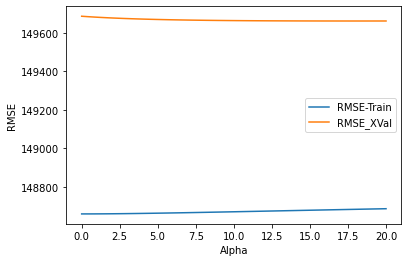

In [55]:
pl.plot(alpha, t_rmse, label='RMSE-Train')
pl.plot(alpha, cv_rmse, label='RMSE_XVal')
pl.legend( ('RMSE-Train', 'RMSE_XVal') )
pl.ylabel('RMSE')
pl.xlabel('Alpha')
pl.show()

In [56]:
#displaying RMSE on training and RMSE of 10-fold cross
#you can see the values are similar but they are very high

a = 0.3
for name,met in [
        ('linear regression', LinearRegression()),
        ('lasso', Lasso(fit_intercept=True, alpha=a)),
        ('ridge', Ridge(fit_intercept=True, alpha=a)),
        ('elastic-net', ElasticNet(fit_intercept=True, alpha=a))
        ]:
    met.fit(x,y)
    p = met.predict(x)
    e = p-y
    total_error = np.dot(e,e)
    rmse_train = np.sqrt(total_error/len(p))

    #kf = KFold(len(x), n_folds=10)
    kf = KFold(n_splits=10)
    kf.get_n_splits(x)

    KFold(n_splits=n,random_state=None, shuffle=False)
    err = 0
    for train,test in kf.split(x):
        met.fit(x[train],y[train])
        p = met.predict(x[test])
        e = p-y[test]
        err += np.dot(e,e)
    rmse_10cv = np.sqrt(err/len(x))
    
    print('Method: %s' %name)
    print('RMSE on training: %.4f' %rmse_train)
    print('RMSE on 10-fold CV: %.4f' %rmse_10cv)
    print ("\n")

Method: linear regression
RMSE on training: 148659.7845
RMSE on 10-fold CV: 150781.0563


Method: lasso
RMSE on training: 148659.7846
RMSE on 10-fold CV: 150781.0535


Method: ridge
RMSE on training: 148659.8042
RMSE on 10-fold CV: 150779.1700


Method: elastic-net
RMSE on training: 149861.6077
RMSE on 10-fold CV: 151807.0399


